In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.special import comb
from itertools import permutations, combinations
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/content/drive/MyDrive/ExcelR/Assignment/Association Rules/book.csv')

In [4]:
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [27]:
df1 = df.copy()

In [28]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ChildBks,2000.0,0.4230,0.494159,0.0,0.0,0.0,1.0,1.0
YouthBks,2000.0,0.2475,0.431668,0.0,0.0,0.0,0.0,1.0
CookBks,2000.0,0.4310,0.495340,0.0,0.0,0.0,1.0,1.0
DoItYBks,2000.0,0.2820,0.450086,0.0,0.0,0.0,1.0,1.0
RefBks,2000.0,0.2145,0.410578,0.0,0.0,0.0,0.0,1.0
ArtBks,2000.0,0.2410,0.427797,0.0,0.0,0.0,0.0,1.0
GeogBks,2000.0,0.2760,0.447129,0.0,0.0,0.0,1.0,1.0
ItalCook,2000.0,0.1135,0.317282,0.0,0.0,0.0,0.0,1.0
ItalAtlas,2000.0,0.0370,0.188809,0.0,0.0,0.0,0.0,1.0
ItalArt,2000.0,0.0485,0.214874,0.0,0.0,0.0,0.0,1.0


In [29]:
df1.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [30]:
df1.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [31]:
df1.shape

(2000, 11)

In [34]:
item_sets={}

In [10]:
te= TransactionEncoder()


In [32]:
te_ary= te.fit(df1).transform(df1)

In [33]:
ap=pd.DataFrame(te_ary,columns=te.columns_)

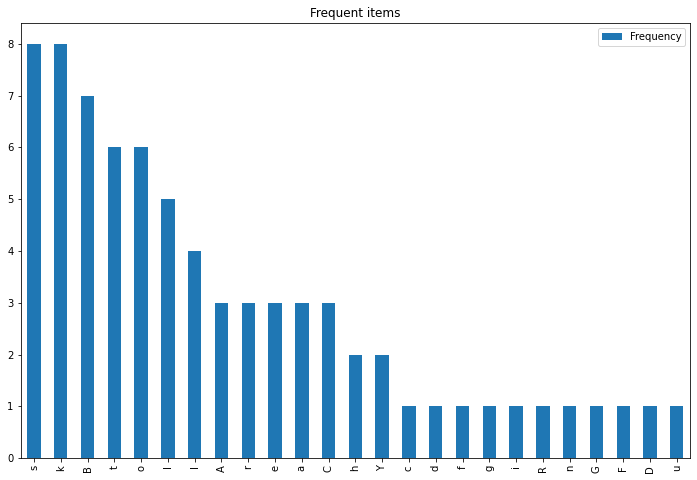

In [35]:
ap.sum().to_frame('Frequency').sort_values('Frequency',ascending=False)[:25].plot(kind='bar',figsize=(12,8),title="Frequent items")
plt.show()

## **Apriori algorithm**

In [14]:
ap_0_5={}
ap_1={}
ap_5={}
ap_1_0={}

In [26]:
confidence = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [36]:
def gen_rules(df,confidence,support):
    ap = {}
    for i in confidence:
        ap_i =apriori(df1,support,True)
        rule= association_rules(ap_i,min_threshold=i)
        ap[i] = len(rule.antecedents)
    return pd.Series(ap).to_frame("Support: %s"%support)

In [37]:
confs=[]

In [38]:
for i in [0.001,0.005,0.01,0.05,0.1]:
    ap_i = gen_rules(ap,confidence=confidence,support=i)
    confs.append(ap_i)

In [39]:
all_conf= pd.concat(confs,axis=1)

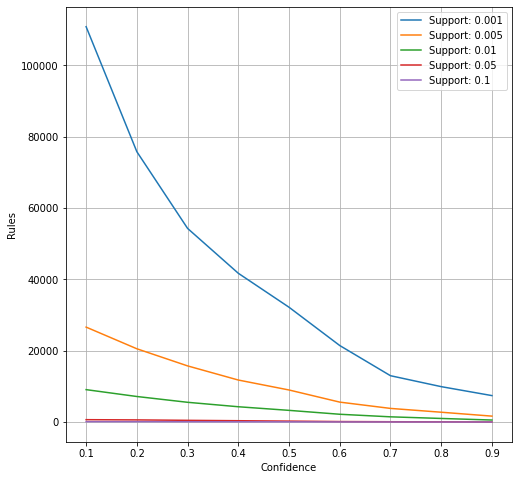

In [41]:
all_conf.plot(figsize=(8,8),grid=True)
plt.xlabel('Confidence')
plt.ylabel('Rules')
plt.show()

# Conclusion from the graph

1. Low confidence have highest numbers of rules.
2. High support have lower number of rules. 

## **Lets try with Suppport 0.01 and confidence at 0.4**

In [42]:
ap_final= apriori(ap,0.001,True)

In [44]:
rules_final=association_rules(ap_final,min_threshold=0.4,support_only=False)

In [45]:
rules_final[rules_final['confidence']>0.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(A),(I),0.0015,0.0020,0.001,0.666667,333.333333,0.000997,2.9940
2,(a),(A),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
3,(A),(a),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
4,(A),(l),0.0015,0.0025,0.001,0.666667,266.666667,0.000996,2.9925
6,(r),(A),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
...,...,...,...,...,...,...,...,...,...
741,"(B, t)","(s, k, Y, o)",0.0015,0.0010,0.001,0.666667,666.666667,0.000999,2.9970
742,"(s, Y)","(k, B, t, o)",0.0010,0.0010,0.001,1.000000,1000.000000,0.000999,inf
744,"(k, Y)","(s, B, t, o)",0.0010,0.0010,0.001,1.000000,1000.000000,0.000999,inf
745,"(t, Y)","(k, s, B, o)",0.0010,0.0020,0.001,1.000000,500.000000,0.000998,inf


In [46]:
support=rules_final['support']
confidence= rules_final["confidence"]
lift= rules_final["lift"]

Text(0.5, 0, 'lift')

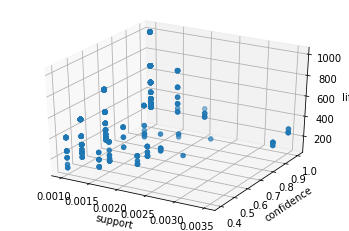

In [47]:
fig1=plt.figure()
ax1=fig1.add_subplot(111,projection='3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel('confidence')
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

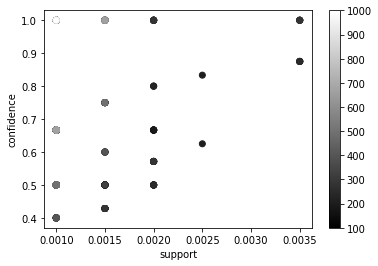

In [48]:
plt.scatter(support,confidence,c=lift,cmap='gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")